In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from adjustText import adjust_text

In [3]:
data_frame = pd.read_csv('../../Data/2019_20/best_januaries_ever.csv')

In [4]:
data_frame.loc[:, 'TS_PCT'] = data_frame.PTS / (2 * (data_frame.FGA + 0.44 * data_frame.FTA))

In [5]:
data_frame.TS_PCT = data_frame.TS_PCT * 100

In [6]:
top_10 = data_frame.iloc[:10]

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
no_lillard = data_frame.loc[data_frame.Player != "Damian Lillard"]
with_lillard = data_frame.loc[data_frame.Player == "Damian Lillard"]

In [9]:
top_efficiency = data_frame.sort_values(by='TS_PCT', ascending=False).iloc[:5]

In [10]:
concated = pd.concat([top_10, top_efficiency], ignore_index=True)

In [11]:
dropped_dups = concated.drop_duplicates()

In [16]:
harden_df = data_frame.loc[(data_frame.Player == "James Harden") & (data_frame.Season == '2018-19')]
kd_df = data_frame.loc[(data_frame.Player == "Kevin Durant") & (data_frame.Season == '2013-14')]

45

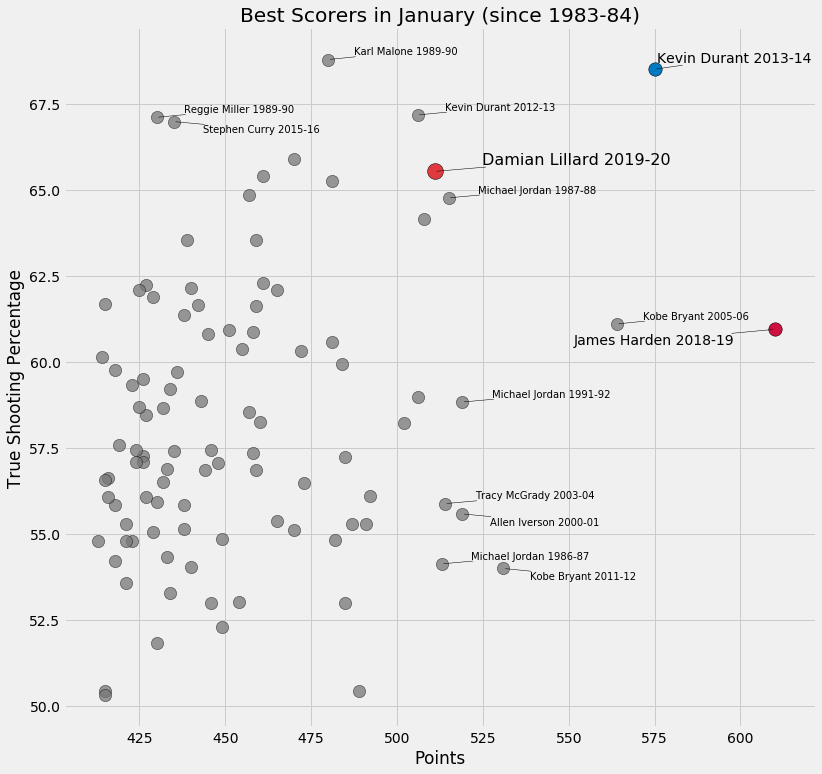

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=no_lillard.PTS, y=no_lillard.TS_PCT, s=150, c='#777777', alpha=0.75, edgecolors='black')
ax.scatter(x=with_lillard.PTS, y=with_lillard.TS_PCT, s=250, c='#E03A3E', alpha=1.0, edgecolors='black')
ax.scatter(x=harden_df.PTS, y=harden_df.TS_PCT, s=180, c='#CE1141', alpha=1.0, edgecolors='black')
ax.scatter(x=kd_df.PTS, y=kd_df.TS_PCT, s=180, c='#007AC1', alpha=1.0, edgecolors='black')

texts = []
for index in range(len(dropped_dups)):
    item = dropped_dups.iloc[index]
    if item.Player == "Damian Lillard":
        texts.append(ax.text(x=item.PTS, y=item.TS_PCT, s=f"{item.Player} {item.Season}", fontsize=16))
    elif (item.Player == "Kevin Durant" and item.Season == '2013-14') or (item.Player == 'James Harden' and item.Season == '2018-19'):
        texts.append(ax.text(x=item.PTS, y=item.TS_PCT, s=f"{item.Player} {item.Season}", fontsize=14))
    else:
        texts.append(ax.text(x=item.PTS, y=item.TS_PCT, s=f"{item.Player} {item.Season}", fontsize=10))
                 
ax.set_xlabel('Points')
ax.set_ylabel('True Shooting Percentage')
ax.set_title("Best Scorers in January (since 1983-84)")
adjust_text(texts, expand_points=(1.5, 1.6), arrowprops=dict(arrowstyle="-", color='k'))